In the modern sense, the perceptron is an algorithm for learning a binary classifier called a threshold function: a function that maps its input x to an output value f(x) (a single binary value):
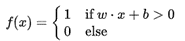
where w  is a vector of real-valued weights, and w*x is the dot product. The bias shifts the decision boundary away from the origin and does not depend on any input value.

The value of f(x) is used to classify x  as either a positive or a negative instance, in the case of a binary classification problem. If b is negative, then the weighted combination of inputs must produce a positive value greater than |b| in order to push the classifier neuron over the 0 threshold. Spatially, the bias alters the position (though not the orientation) of the decision boundary. The perceptron learning algorithm does not terminate if the learning set is not linearly separable. If the vectors are not linearly separable learning will never reach a point where all vectors are classified properly.

> In this exercise the step activation function was used.In this fuction if the value in the neuron is bigger than 1 then the neuron is activated and it's output is set to 1 else its not activated and it's output is set to 0.



In [1]:
import numpy as np

class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=5, learning_rate=0.1):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.ones(no_of_inputs + 1)
        self.prediction=np.ones(6)
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for iterator in range(self.threshold):
            i=0
            for inputs, label in zip(training_inputs, labels):
                
                self.prediction[i] = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - self.prediction[i]) * inputs
                self.weights[0] += self.learning_rate * (label - self.prediction[i])
                i=i+1
                
            
    

[1. 1. 0. 0. 0. 0.]
the weights are :
the weight w0 is : -0.09999999999999987
the weight w1 is : -0.39999999999999997
the weight w2 is : 0.8


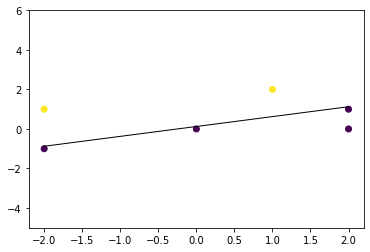

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt




training_inputs = []
training_inputs.append(np.array([-2, 1]))
training_inputs.append(np.array([1, 2]))
training_inputs.append(np.array([0, 0]))
training_inputs.append(np.array([-2, -1]))
training_inputs.append(np.array([2, 0]))
training_inputs.append(np.array([2, 1]))

labels = np.array([1, 1, 0, 0,0,0])
#We instantiate a new perceptron, only passing in the argument 2 therefore allowing for the default threshold=100 and learning_rate=0.01
perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)



fig = plt.figure()
ax = fig.add_subplot(1,1,1)

print(perceptron.prediction)
print("the weights are :")
print("the weight w0 is :",perceptron.weights[0])
print("the weight w1 is :",perceptron.weights[1])
print("the weight w2 is :",perceptron.weights[2])
training_inp0=[row[0] for row in training_inputs]
training_inp1=[row[1] for row in training_inputs]

plt.scatter(training_inp0,training_inp1,marker='o',c=labels)

x0_1 = np.amin(training_inp0)
x0_2 = np.amax(training_inp0)

x1_1 = (-perceptron.weights[1] * x0_1 - perceptron.weights[0]) / perceptron.weights[2]
x1_2 = (-perceptron.weights[1] * x0_2 - perceptron.weights[0]) / perceptron.weights[2]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k',linewidth=1)

ymin = np.amin(training_inp1)
ymax = np.amax(training_inp1)
ax.set_ylim([ymin-4,ymax+4])

plt.show()


After 5 iterations with learning_rate=0.1 our model has successfully classified all the samples (see the plot above).<br>The weights are:<br>the weight w0 is : -0.09999999999999987<br>
the weight w1 is : -0.39999999999999997<br>
the weight w2 is : 0.8